In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import acf, kpss
from statsmodels.formula.api import ols

In [2]:
GITHUB_REPO = "https://raw.githubusercontent.com/randall-romero/econometria/master/data/"
DATAPATH = GITHUB_REPO if 'google.colab' in str(get_ipython()) else '../data/'

In [3]:
datos = pd.read_stata(DATAPATH + 'NelsonPlosserData.dta')
datos.set_index('year',inplace=True)
datos.index = datos.index.year

In [4]:
titulos = [f'r{i}' for i in range(1,7)] # para rotular unas tablas abajo

In [5]:
variables = {'lrgnp':'Real GNP',
           'lgnp':'Nominal GNP',
           'lpcrgnp':'Real per capita GNP',
           'lip':'Industrial production',
           'lemp':'Employment', 
           'lun':'Unemployment rate',
           'lprgnp':'GNP deflator',
           'lcpi':'Consumer prices',
           'lwg':'Wages',
           'lrwg':'Real wages', 
           'lm':'Money stock', 
           'lvel':'Velocity',
           'bnd':'Bond yield',
           'lsp500':'Common stock prices'}

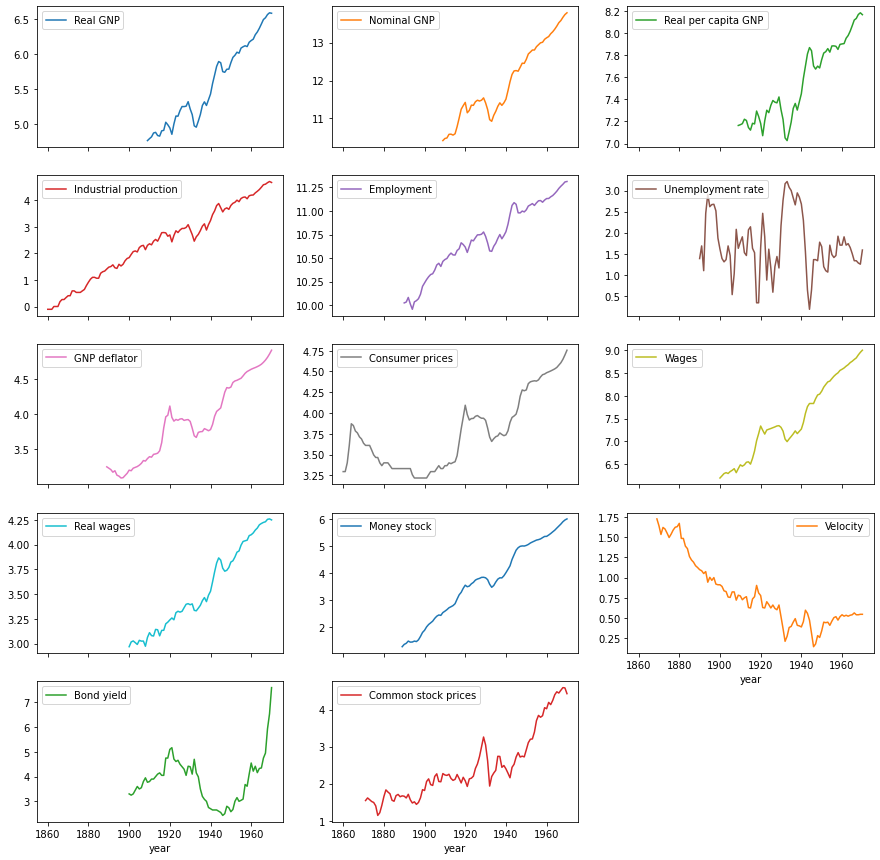

In [6]:
datos = datos[variables.keys()].rename(columns=variables)
datos.plot(subplots=True, figsize=[15,15], layout=[-1,3]);


In [7]:
def acf6lags(nombre_variable, d):
    """
    Calcula los primeros 6 coeficientes de autocorrelación
    
    Args:
        nombre_variable: str, el nombre de una columna de la tabla "datos"
        d: número de veces que hay que diferenciar la serie (0 o 1 en la práctica)

    Returns:
        np.array, los 6 coeficientes de autocorrelación, redondeados a dos decimales
    """
    serie = datos[nombre_variable].diff(d) if d>0 else datos[nombre_variable]
    return acf(serie.dropna(), nlags=6, fft=False)[1:].round(2)

In [8]:
def tabla_acf(d):
    """
    Crea una tabla con las primeras 6 autocorrelaciones de todas las series en "datos"

    Args:
        d:  int, número de veces que hay que diferenciar la serie (0 o 1 en la práctica)

    Returns:
        una tabla de pandas, series en las filas, número de rezagos en las columnas
    """
    return pd.DataFrame([acf6lags(serie,d) for serie in datos], index=variables.values(), columns=titulos)

In [9]:
tabla2 = tabla_acf(0)
tabla2

,r1,r2,r3,r4,r5,r6
Real GNP,0.95,0.90,0.84,0.79,0.74,0.69
Nominal GNP,0.95,0.89,0.83,0.77,0.72,0.67
Real per capita GNP,0.95,0.88,0.81,0.75,0.70,0.65
Industrial production,0.97,0.94,0.90,0.87,0.84,0.81
Employment,0.96,0.91,0.86,0.81,0.76,0.71
Unemployment rate,0.75,0.47,0.32,0.17,0.04,-0.01
GNP deflator,0.96,0.93,0.89,0.84,0.80,0.76
Consumer prices,0.96,0.92,0.87,0.84,0.80,0.77
Wages,0.96,0.91,0.86,0.82,0.77,0.73
Real wages,0.96,0.92,0.88,0.84,0.80,0.75


In [10]:
def rango_datos(ser):
    """
    Determina el rango de los datos disponibles de una serie
    Args:
        ser: una serie de pandas

    Returns:
        str, primera observación -- última observación
    """
    return f'{ser.first_valid_index()} -- {ser.last_valid_index()}'


In [11]:
datos.apply(rango_datos)

Real GNP                 1909 -- 1970
Nominal GNP              1909 -- 1970
Real per capita GNP      1909 -- 1970
Industrial production    1860 -- 1970
Employment               1890 -- 1970
Unemployment rate        1890 -- 1970
GNP deflator             1889 -- 1970
Consumer prices          1860 -- 1970
Wages                    1900 -- 1970
Real wages               1900 -- 1970
Money stock              1889 -- 1970
Velocity                 1869 -- 1970
Bond yield               1900 -- 1970
Common stock prices      1871 -- 1970
dtype: object

In [12]:
tabla2.insert(0,'Period', datos.apply(rango_datos))
tabla2.insert(1, 'T', datos.apply(lambda ser: ser.dropna().count()))
tabla2

,Period,T,r1,r2,r3,r4,r5,r6
Real GNP,1909 -- 1970,62,0.95,0.90,0.84,0.79,0.74,0.69
Nominal GNP,1909 -- 1970,62,0.95,0.89,0.83,0.77,0.72,0.67
Real per capita GNP,1909 -- 1970,62,0.95,0.88,0.81,0.75,0.70,0.65
Industrial production,1860 -- 1970,111,0.97,0.94,0.90,0.87,0.84,0.81
Employment,1890 -- 1970,81,0.96,0.91,0.86,0.81,0.76,0.71
Unemployment rate,1890 -- 1970,81,0.75,0.47,0.32,0.17,0.04,-0.01
GNP deflator,1889 -- 1970,82,0.96,0.93,0.89,0.84,0.80,0.76
Consumer prices,1860 -- 1970,111,0.96,0.92,0.87,0.84,0.80,0.77
Wages,1900 -- 1970,71,0.96,0.91,0.86,0.82,0.77,0.73
Real wages,1900 -- 1970,71,0.96,0.92,0.88,0.84,0.80,0.75


In [13]:
tabla3 = tabla_acf(1)
tabla3.insert(0,'Period', datos.apply(rango_datos))
tabla3.insert(1, 'T', datos.apply(lambda ser: ser.dropna().count()))
tabla3

,Period,T,r1,r2,r3,r4,r5,r6
Real GNP,1909 -- 1970,62,0.34,0.04,-0.18,-0.23,-0.19,0.01
Nominal GNP,1909 -- 1970,62,0.44,0.08,-0.12,-0.24,-0.07,0.15
Real per capita GNP,1909 -- 1970,62,0.33,0.04,-0.17,-0.21,-0.18,0.02
Industrial production,1860 -- 1970,111,0.03,-0.11,-0.00,-0.11,-0.28,0.05
Employment,1890 -- 1970,81,0.32,-0.05,-0.08,-0.17,-0.20,0.01
Unemployment rate,1890 -- 1970,81,0.09,-0.29,0.03,-0.03,-0.19,0.01
GNP deflator,1889 -- 1970,82,0.43,0.20,0.07,-0.06,0.03,0.02
Consumer prices,1860 -- 1970,111,0.58,0.16,0.02,-0.00,0.05,0.03
Wages,1900 -- 1970,71,0.46,0.10,-0.03,-0.09,-0.09,0.08
Real wages,1900 -- 1970,71,0.19,-0.03,-0.07,-0.11,-0.18,-0.15


In [14]:
def acf_deviation_from_trend(nombre_variable):
    """
    Calcular las primeras 6 autocorrelaciones de la desviación de una serie respecto a 
    su tendencia lineal.
    
    Se estima por mínimos cuadrados ordinarios una regresión de la forma
        y = intercepto + time
    
    y se calcula la autocorrelación de los residuos.
    Args:
        nombre_variable: str, nombre de una variable de la tabla "datos" 

    Returns:
        np.array, los 6 coeficientes de autocorrelación, redondeados a dos decimales
    """
    temp = datos[[nombre_variable]].dropna()
    temp.columns = ['y']
    temp['t'] = np.arange(temp.shape[0]) 
    resid = ols('y ~ t', temp).fit().resid
    return acf(resid, nlags=6, fft=False)[1:].round(2)

In [15]:
tabla4 = pd.DataFrame([acf_deviation_from_trend(ser) for ser in datos], index=variables.values(), columns=titulos)
tabla4.insert(0,'Period', datos.apply(rango_datos))
tabla4.insert(1, 'T', datos.apply(lambda ser: ser.dropna().count()))
tabla4

,Period,T,r1,r2,r3,r4,r5,r6
Real GNP,1909 -- 1970,62,0.87,0.66,0.44,0.26,0.13,0.07
Nominal GNP,1909 -- 1970,62,0.93,0.79,0.65,0.52,0.43,0.35
Real per capita GNP,1909 -- 1970,62,0.87,0.65,0.43,0.24,0.11,0.04
Industrial production,1860 -- 1970,111,0.84,0.67,0.53,0.40,0.29,0.28
Employment,1890 -- 1970,81,0.89,0.71,0.55,0.39,0.25,0.17
Unemployment rate,1890 -- 1970,81,0.75,0.46,0.30,0.15,0.03,-0.01
GNP deflator,1889 -- 1970,82,0.92,0.81,0.67,0.54,0.42,0.30
Consumer prices,1860 -- 1970,111,0.97,0.91,0.84,0.78,0.71,0.63
Wages,1900 -- 1970,71,0.93,0.81,0.67,0.54,0.42,0.31
Real wages,1900 -- 1970,71,0.87,0.69,0.52,0.38,0.26,0.19


In [16]:
pd.concat([tabla2, tabla3, tabla4], axis=1)

,Period,T,r1,r2,r3,r4,r5,r6,Period,T,...,r5,r6,Period,T,r1,r2,r3,r4,r5,r6
Real GNP,1909 -- 1970,62,0.95,0.90,0.84,0.79,0.74,0.69,1909 -- 1970,62,...,-0.19,0.01,1909 -- 1970,62,0.87,0.66,0.44,0.26,0.13,0.07
Nominal GNP,1909 -- 1970,62,0.95,0.89,0.83,0.77,0.72,0.67,1909 -- 1970,62,...,-0.07,0.15,1909 -- 1970,62,0.93,0.79,0.65,0.52,0.43,0.35
Real per capita GNP,1909 -- 1970,62,0.95,0.88,0.81,0.75,0.70,0.65,1909 -- 1970,62,...,-0.18,0.02,1909 -- 1970,62,0.87,0.65,0.43,0.24,0.11,0.04
Industrial production,1860 -- 1970,111,0.97,0.94,0.90,0.87,0.84,0.81,1860 -- 1970,111,...,-0.28,0.05,1860 -- 1970,111,0.84,0.67,0.53,0.40,0.29,0.28
Employment,1890 -- 1970,81,0.96,0.91,0.86,0.81,0.76,0.71,1890 -- 1970,81,...,-0.20,0.01,1890 -- 1970,81,0.89,0.71,0.55,0.39,0.25,0.17
Unemployment rate,1890 -- 1970,81,0.75,0.47,0.32,0.17,0.04,-0.01,1890 -- 1970,81,...,-0.19,0.01,1890 -- 1970,81,0.75,0.46,0.30,0.15,0.03,-0.01
GNP deflator,1889 -- 1970,82,0.96,0.93,0.89,0.84,0.80,0.76,1889 -- 1970,82,...,0.03,0.02,1889 -- 1970,82,0.92,0.81,0.67,0.54,0.42,0.30
Consumer prices,1860 -- 1970,111,0.96,0.92,0.87,0.84,0.80,0.77,1860 -- 1970,111,...,0.05,0.03,1860 -- 1970,111,0.97,0.91,0.84,0.78,0.71,0.63
Wages,1900 -- 1970,71,0.96,0.91,0.86,0.82,0.77,0.73,1900 -- 1970,71,...,-0.09,0.08,1900 -- 1970,71,0.93,0.81,0.67,0.54,0.42,0.31
Real wages,1900 -- 1970,71,0.96,0.92,0.88,0.84,0.80,0.75,1900 -- 1970,71,...,-0.18,-0.15,1900 -- 1970,71,0.87,0.69,0.52,0.38,0.26,0.19


In [17]:
pd.concat([tabla2, tabla3.iloc[:,-6:], tabla4.iloc[:,-6:]], axis=1, keys=['Niveles','Diferencias','Desviación de tendencia'])

Niveles                                           \
                             Period    T    r1    r2    r3    r4    r5    r6   
Real GNP               1909 -- 1970   62  0.95  0.90  0.84  0.79  0.74  0.69   
Nominal GNP            1909 -- 1970   62  0.95  0.89  0.83  0.77  0.72  0.67   
Real per capita GNP    1909 -- 1970   62  0.95  0.88  0.81  0.75  0.70  0.65   
Industrial production  1860 -- 1970  111  0.97  0.94  0.90  0.87  0.84  0.81   
Employment             1890 -- 1970   81  0.96  0.91  0.86  0.81  0.76  0.71   
Unemployment rate      1890 -- 1970   81  0.75  0.47  0.32  0.17  0.04 -0.01   
GNP deflator           1889 -- 1970   82  0.96  0.93  0.89  0.84  0.80  0.76   
Consumer prices        1860 -- 1970  111  0.96  0.92  0.87  0.84  0.80  0.77   
Wages                  1900 -- 1970   71  0.96  0.91  0.86  0.82  0.77  0.73   
Real wages             1900 -- 1970   71  0.96  0.92  0.88  0.84  0.80  0.75   
Money stock            1889 -- 1970   82  0.96  0.92  0.89  0.85  0.81  0.77   
Velocity               1869 -- 1970  102  0.96  0.92  0.88  0.85  0.81  0.79   
Bond yield             1900 -- 1970   71  0.84  0.72  0.60  0.52  0.46  0.40   
Common stock prices    1871 -- 1970  100  0.96  0.90  0.85  0.79  0.75  0.71   

                      Diferencias                                \
                               r1    r2    r3    r4    r5    r6   
Real GNP                     0.34  0.04 -0.18 -0.23 -0.19  0.01   
Nominal GNP                  0.44  0.08 -0.12 -0.24 -0.07  0.15   
Real per capita GNP          0.33  0.04 -0.17 -0.21 -0.18  0.02   
Industrial production        0.03 -0.11 -0.00 -0.11 -0.28  0.05   
Employment                   0.32 -0.05 -0.08 -0.17 -0.20  0.01   
Unemployment rate            0.09 -0.29  0.03 -0.03 -0.19  0.01   
GNP deflator                 0.43  0.20  0.07 -0.06  0.03  0.02   
Consumer prices              0.58  0.16  0.02 -0.00  0.05  0.03   
Wages                        0.46  0.10 -0.03 -0.09 -0.09  0.08   
Real wages                   0.19 -0.03 -0.07 -0.11 -0.18 -0.15   
Money stock                  0.62  0.30  0.13 -0.01 -0.07 -0.04   
Velocity                     0.11 -0.04 -0.16 -0.15 -0.11  0.11   
Bond yield                   0.18  0.31  0.15  0.04  0.06  0.05   
Common stock prices          0.22 -0.13 -0.08 -0.18 -0.23  0.02   

                      Desviación de tendencia                                
                                           r1    r2    r3    r4    r5    r6  
Real GNP                                 0.87  0.66  0.44  0.26  0.13  0.07  
Nominal GNP                              0.93  0.79  0.65  0.52  0.43  0.35  
Real per capita GNP                      0.87  0.65  0.43  0.24  0.11  0.04  
Industrial production                    0.84  0.67  0.53  0.40  0.29  0.28  
Employment                               0.89  0.71  0.55  0.39  0.25  0.17  
Unemployment rate                        0.75  0.46  0.30  0.15  0.03 -0.01  
GNP deflator                             0.92  0.81  0.67  0.54  0.42  0.30  
Consumer prices                          0.97  0.91  0.84  0.78  0.71  0.63  
Wages                                    0.93  0.81  0.67  0.54  0.42  0.31  
Real wages                               0.87  0.69  0.52  0.38  0.26  0.19  
Money stock                              0.95  0.83  0.69  0.53  0.37  0.21  
Velocity                                 0.91  0.81  0.72  0.65  0.59  0.56  
Bond yield                               0.85  0.73  0.62  0.55  0.49  0.43  
Common stock prices                      0.90  0.76  0.64  0.53  0.46  0.43

In [18]:
def ADFregression(nombre_variable, k):
    """
    Estima la regresión necesaria para la prueba aumentada de Dickey-Fuller
    Args:
        nombre_variable: str, nombre de una variable de la tabla "datos"
        k: Número de rezagos del proceso AR subyacente (1 + rezagos en regresión)

    Returns:
        Un objeto de resultados estimados de statsmodels
    """
    temp = datos[[nombre_variable]].dropna()
    temp.columns=['Y']
    temp['DY'] = temp['Y'].diff()
    temp['LY'] = temp['Y'].shift()
    temp['t'] = np.arange(temp.shape[0])    
    for j in range(1, k):
        temp[f'D{j}Y'] = temp['DY'].shift(j)
        regresores = ' + '.join(temp.columns[2:])
    print(regresores)
    frml = 'DY ~ ' + regresores
    return ols(frml, temp).fit()
    

In [19]:
ADFregression('Real GNP', 4).summary()

LY + t + D1Y + D2Y + D3Y


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DY   R-squared:                       0.265
Model:                            OLS   Adj. R-squared:                  0.194
Method:                 Least Squares   F-statistic:                     3.753
Date:                Sun, 24 Apr 2022   Prob (F-statistic):            0.00563
Time:                        16:21:14   Log-Likelihood:                 84.601
No. Observations:                  58   AIC:                            -157.2
Df Residuals:                      52   BIC:                            -144.8
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8645      0.317      2.723      0.009       0.227       1.501
LY            -0.1880      0.070     -2.687      0.010      -0.328      -0.048
t              0.0062      0.002      2.803      0.007       0.002       0.011
D1Y            0.3991      0.129      3.091      0.003       0.140       0.658
D2Y            0.0741      0.140      0.531      0.598      -0.206       0.354
D3Y           -0.0693      0.136     -0.509      0.613      -0.343       0.204
==============================================================================
Omnibus:                        3.110   Durbin-Watson:                   2.010
Prob(Omnibus):                  0.211   Jarque-Bera (JB):                2.243
Skew:                          -0.313   Prob(JB):                        0.326
Kurtosis:                       3.732   Cond. No.                     1.57e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [20]:
def NelsonPlosser(ser, k):
    """
    Calcula varios estadísticos de la regresión de la prueba aumentada de Dickey-Fuller, 
    para reproducir los resultados reportados en la tabla 5 de Nelson y Plosser (1982)
    
    Args:
        ser: str, nombre abreviado de una variable de la tabla "datos"
        k: Número de rezagos del proceso AR subyacente (1 + rezagos en regresión)

    Returns:
        dict, estadísticos calculados        
    """
    nombre_variable = variables[ser]
    fuller5pct = -3.45
    model = ADFregression(nombre_variable, k)
    
    estadisticos = {
        'mu': np.round(model.params['Intercept'], 3),
        't(mu)': np.round(model.tvalues['Intercept'], 2),
        'gamma': np.round(model.params['t'], 3),
        't(gamma)': np.round(model.tvalues['t'], 2),
        'rho': np.round(model.params['LY'] + 1, 3),
        't(rho)': np.round(model.tvalues['LY'], 2),
        's(u)': np.round(np.sqrt(model.mse_resid),3),
        'r1': acf(model.resid, nlags=1, fft=False)[1].round(2),
        'resultado': '* estacionaria' if model.tvalues['LY'] < fuller5pct else 'raiz unitaria'
    }
    
    return estadisticos
    

In [21]:
NelsonPlosser('lrgnp', 3)

LY + t + D1Y + D2Y


{'mu': 0.872,
 't(mu)': 2.98,
 'gamma': 0.006,
 't(gamma)': 2.99,
 'rho': 0.811,
 't(rho)': -2.94,
 's(u)': 0.059,
 'r1': -0.01,
 'resultado': 'raiz unitaria'}

In [22]:
rezagos = {'lrgnp':2, 'lgnp':2, 'lpcrgnp':2,'lip':6, 'lemp':3, 'lun':4, 'lprgnp':2, 'lcpi':4, 'lwg':3, 'lrwg':2, 'lm':2, 'lvel':4,'bnd':3,'lsp500':3}

In [23]:
tabla5 = pd.DataFrame([NelsonPlosser(ser, lags) for ser, lags in rezagos.items()], index=rezagos.keys())
tabla5

LY + t + D1Y
LY + t + D1Y
LY + t + D1Y
LY + t + D1Y + D2Y + D3Y + D4Y + D5Y
LY + t + D1Y + D2Y
LY + t + D1Y + D2Y + D3Y
LY + t + D1Y


LY + t + D1Y + D2Y + D3Y
LY + t + D1Y + D2Y
LY + t + D1Y
LY + t + D1Y
LY + t + D1Y + D2Y + D3Y


LY + t + D1Y + D2Y
LY + t + D1Y + D2Y


,mu,t(mu),gamma,t(gamma),rho,t(rho),s(u),r1,resultado
lrgnp,0.813,3.04,0.006,3.03,0.825,-2.99,0.058,-0.03,raiz unitaria
lgnp,1.056,2.37,0.006,2.34,0.899,-2.32,0.087,0.03,raiz unitaria
lpcrgnp,1.274,3.05,0.004,3.01,0.818,-3.05,0.059,-0.03,raiz unitaria
lip,0.070,2.95,0.007,2.44,0.835,-2.53,0.097,0.03,raiz unitaria
lemp,1.414,2.68,0.002,2.54,0.861,-2.66,0.035,0.03,raiz unitaria
lun,0.515,2.76,-0.000,-0.23,0.706,-3.55,0.407,0.02,* estacionaria
lprgnp,0.258,2.55,0.002,2.65,0.915,-2.52,0.046,-0.04,raiz unitaria
lcpi,0.088,1.74,0.001,2.84,0.968,-1.97,0.042,-0.14,raiz unitaria
lwg,0.558,2.30,0.004,2.30,0.910,-2.24,0.060,0.00,raiz unitaria
lrwg,0.484,3.10,0.004,3.14,0.831,-3.05,0.035,-0.02,raiz unitaria
